# Bank Marketing Campaigns Analysis

## Project Overview

**Source:** Kaggle - Bank Marketing Dataset 

### Key Features:

**Target Variable**

y: Client subscribed to a term deposit? (yes/no)
A term deposit is a fixed-time bank investment that earns interest and restricts access until maturity.

**Predictor Variables**

- **Demographic**

These describe the personal background of each client, including their age, job type, marital status, and level of education. They also indicate whether the client has any financial obligations such as a credit default, a housing loan, or a personal loan.

- **Financial**
This reflects the client’s financial standing, specifically through their current account balance, which may influence their decision-making or eligibility for term deposits.

- **Current Campaign**
These capture information about the ongoing marketing campaign, including how the client was contacted (e.g., cellular or telephone), the specific day and month they were last contacted, the duration of that contact in seconds, and how many times they were contacted during the current campaign.

- **Previous Campaign** 
These provide context from earlier marketing efforts, such as how many days have passed since the client was last contacted, how many times they were contacted in previous campaigns, and what the outcome of those previous contacts was (e.g., success or failure).

## Exploratory Data Analysis

### Import Librairies

In [55]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


### Data Profiling

In [56]:
# Loading the data
df = pd.read_csv('bank-full.csv')

In [57]:
# preview the 5 first rows
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [58]:
# The shape of dataset
print("Dataset shape:")
print(df.shape)

Dataset shape:
(45211, 17)


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


- 17 Columns with 7 numerical and 10 categorical
- No missing values

In [60]:
# Summary Statistics
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [61]:
# Expanded Statistical Summary
num_columns = ['age','balance','day','duration','campaign','pdays','previous'] 

ds = pd.DataFrame({
    'Mean': df[num_columns].mean(),
    'Median': df[num_columns].median(),
    'Mode': df[num_columns].mode().iloc[0],
    'Standard Deviation': df[num_columns].std(),
    'Variance': df[num_columns].var(),
    'Skewness': df[num_columns].skew(),
    'Kurtosis': df[num_columns].kurt()
})
ds

,Mean,Median,Mode,Standard Deviation,Variance,Skewness,Kurtosis
age,40.936210,39.0,32,10.618762,1.127581e+02,0.684818,0.319570
balance,1362.272058,448.0,0,3044.765829,9.270599e+06,8.360308,140.751547
day,15.806419,16.0,20,8.322476,6.926361e+01,0.093079,-1.059897
duration,258.163080,180.0,124,257.527812,6.632057e+04,3.144318,18.153915
campaign,2.763841,2.0,1,3.098021,9.597733e+00,4.898650,39.249651
pdays,40.197828,-1.0,-1,100.128746,1.002577e+04,2.615715,6.935195
previous,0.580323,0.0,0,2.303441,5.305841e+00,41.846454,4506.860660


- **Age** Slightly right-skewed (mean > median > mode).Most people are in their late 30s to early 40s.                           
- **Balance** Strong right skew and extreme outliers (skewness = 8.36, kurtosis = 140.75).Most people have low or zero balance, but a few have very high amounts.                                                                                              
- **Day** Symmetrical distribution (mean ≈ median ≈ mode).Contacts are evenly spread across the month                           
- **Duration** Right-skewed with some very long calls. Most calls are short; a few outliers inflate the average.                 
- **Campaign** Right-skewed, most values are low. Most clients are contacted only 1–2 times.                                     
- **Pdays** Median = -1 indicates most were never contacted before. Wide variability among those who were contacted.             
- **Previous** Almost everyone has 0 past contacts. A few outliers with high values skew the data heavily.


In [62]:
# Value Counts Summary for Categorical Columns
categorical_columns = df.select_dtypes(include='object').columns.tolist()
for col in categorical_columns:
    print(f"\n{col} - Value Counts with Percentages:")
    print(df[col].value_counts().to_frame('Count').assign(
        Percent=lambda x: round(100 * x['Count'] / x['Count'].sum(), 2)))


job - Value Counts with Percentages:
               Count  Percent
job                          
blue-collar     9732    21.53
management      9458    20.92
technician      7597    16.80
admin.          5171    11.44
services        4154     9.19
retired         2264     5.01
self-employed   1579     3.49
entrepreneur    1487     3.29
unemployed      1303     2.88
housemaid       1240     2.74
student          938     2.07
unknown          288     0.64

marital - Value Counts with Percentages:
          Count  Percent
marital                 
married   27214    60.19
single    12790    28.29
divorced   5207    11.52

education - Value Counts with Percentages:
           Count  Percent
education                
secondary  23202    51.32
tertiary   13301    29.42
primary     6851    15.15
unknown     1857     4.11

default - Value Counts with Percentages:
         Count  Percent
default                
no       44396     98.2
yes        815      1.8

housing - Value Counts with Percenta

**Take aways**

- **Job**: 12 categories; blue-collar and management are the most common.

- **Marital Status**: Majority are married.

- **Education**: Most clients have secondary (51%) and tertiary (29%) education.

- **Default**: Highly imbalanced—only 1.8% have credit in default.

- **Housing Loan**: Fairly balanced—56% have a housing loan, 44% do not.

- **Personal Loan**: Imbalanced—only 16% have a personal loan.

- **Contact Method**: 65% via cellular, but 29% are labeled as unknown.

- **Month of Contact**: May is the most frequent campaign month (30%).

- **Previous Campaign Outcome (poutcome)**: Heavily skewed—unknown for ~82% of records

- **Target Variable (Subscription)**: Strong class imbalance—only 11.7% of clients subscribed to a term deposit.


### UNIVARIATE ANALYSIS

In [63]:
from IPython.core.display import HTML

# Define Custom Color Palette
custom_palette = ['#f28e2b', '#4e79a7']  # Orange and Blue
sns.set_style("whitegrid")
sns.set_palette(custom_palette)
plt.rcParams.update({
    "axes.facecolor": "white",
    "figure.facecolor": "white",
    "axes.edgecolor": "#f28e2b",       # Orange border
    "axes.labelcolor": "#4e79a7",      # Blue labels
    "xtick.color": "#4e79a7",          # Blue X-axis ticks
    "ytick.color": "#4e79a7",          # Blue Y-axis ticks
    "grid.color": "#fdd8b1",           # Light orange grid
    "text.color": "#4e79a7",           # Blue text
    "axes.titleweight": "bold",
    "axes.titlesize": 14,
    "axes.labelsize": 12
})

plt.rcParams.update({
    "axes.facecolor": "white",
    "figure.facecolor": "white",
    "axes.edgecolor": "#f28e2b",       # Orange border
    "axes.labelcolor": "#4e79a7",      # Blue labels
    "xtick.color": "#4e79a7",          # Blue X-axis ticks
    "ytick.color": "#4e79a7",          # Blue Y-axis ticks
    "grid.color": "#fdd8b1",           # Light orange grid
    "text.color": "#4e79a7",           # Blue text
    "axes.titleweight": "bold",
    "axes.titlesize": 14,
    "axes.labelsize": 12
})

HTML("""
<style>
body {
    background-color: white !important;
}
.jp-InputArea {
    background-color: white !important;
    border-radius: 10px;
}
.jp-CodeMirrorEditor {
    background-color: white !important;
}
.jp-Cell {
    border: 2px solid #f28e2b !important;  /* Orange border */
    border-radius: 8px;
}
</style>
""")

#### Categorical Variables

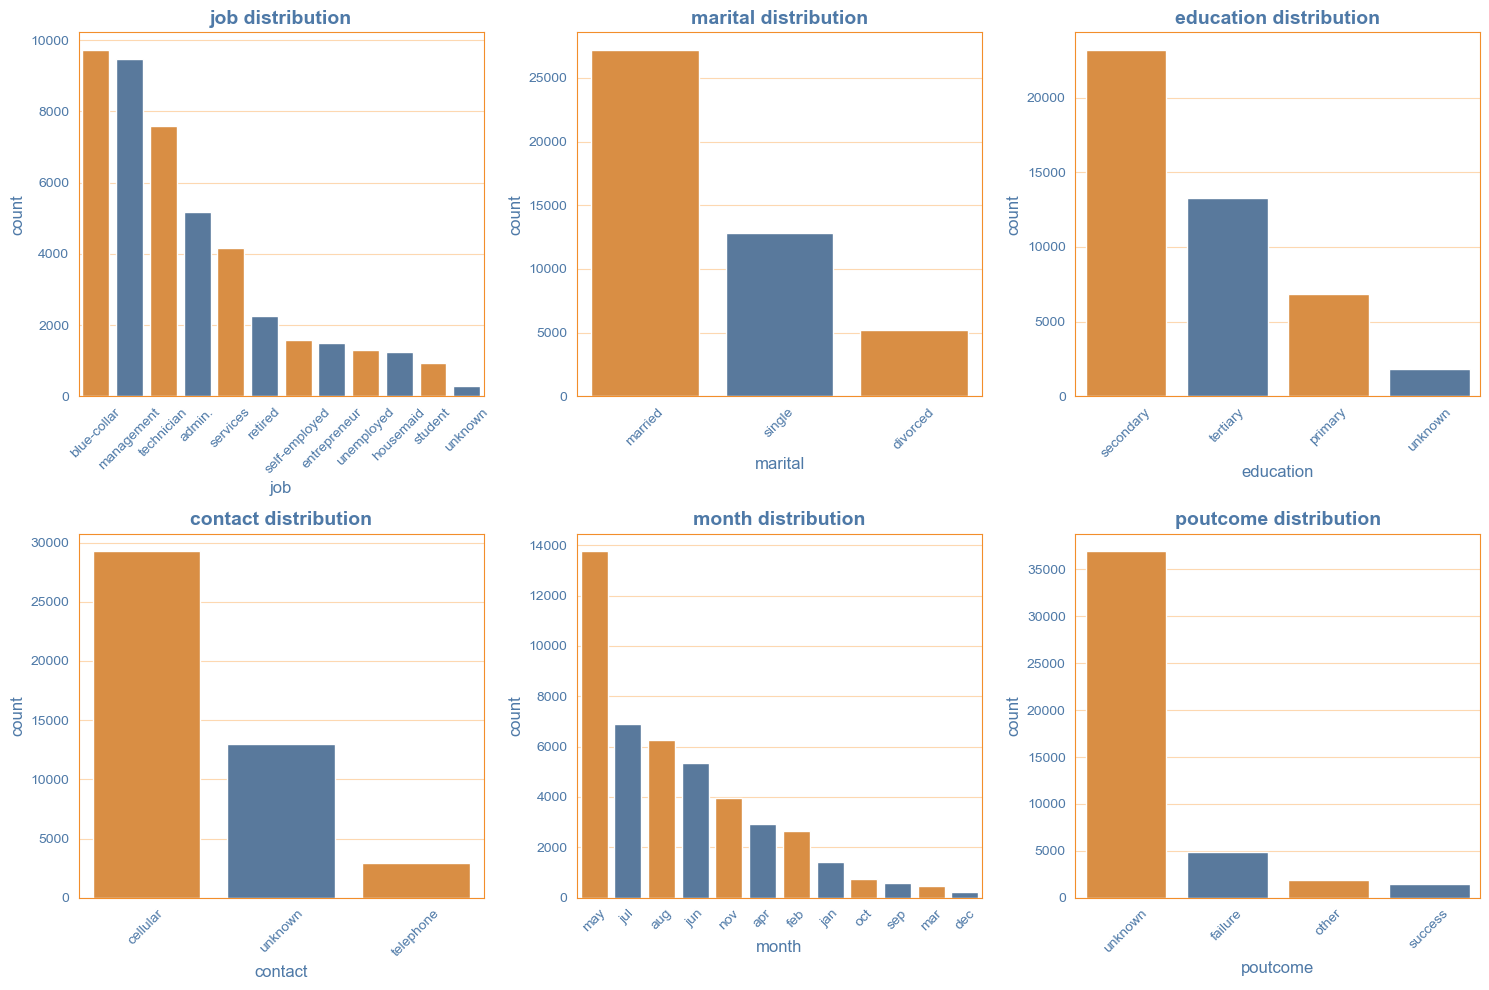

In [64]:
categorical_cols = ['job', 'marital', 'education', 'contact', 'month','poutcome']

# Set up the subplot grid
nb_cols = 3  # number of plots per row
nb_rows = (len(categorical_cols) + nb_cols - 1) // nb_cols

fig, axes = plt.subplots(nb_rows, nb_cols, figsize=(5*nb_cols, 5*nb_rows))
axes = axes.flatten()

# Plot each categorical column
for i, col in enumerate(categorical_cols):
    sns.countplot(data=df, x=col, ax=axes[i], order=df[col].value_counts().index, palette= custom_palette)
    axes[i].set_title(f'{col} distribution')
    axes[i].tick_params(axis='x', rotation=45)

# Remove empty subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


- Most clients are married, have secondary education, and work in blue-collar or management jobs. 
- Contacts were mainly via cellular and peaked in May and very low in December. 
- Prior campaign outcomes are mostly unknown.

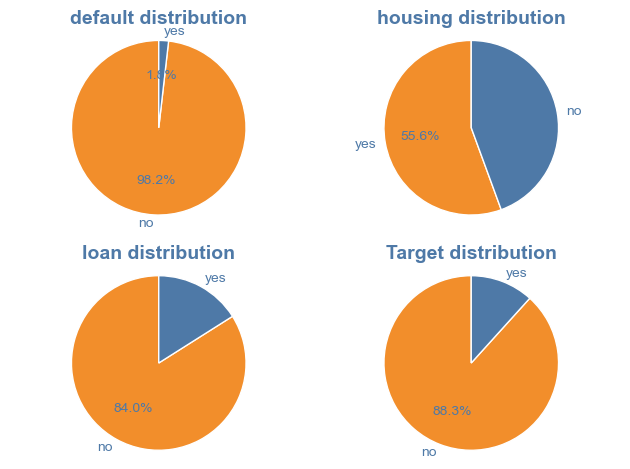

In [65]:
binary_cols = ['default', 'housing', 'loan', 'Target']
fig, axes = plt.subplots(2, 2)
axes = axes.flatten()

for i, col in enumerate(binary_cols):
    counts = df[col].value_counts()
    labels = counts.index.astype(str)
    sizes = counts.values
    
    axes[i].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=custom_palette)
    axes[i].axis('equal')
    axes[i].set_title(f'{col} distribution')

plt.tight_layout()
plt.show()

- Most clients have no credit defaults, indicating low risk.

- Over half have housing loans, and only 16% have personal loans.

- Only 11.7% subscribed to term deposits, showing a need for better targeting.

#### Numerical Variables

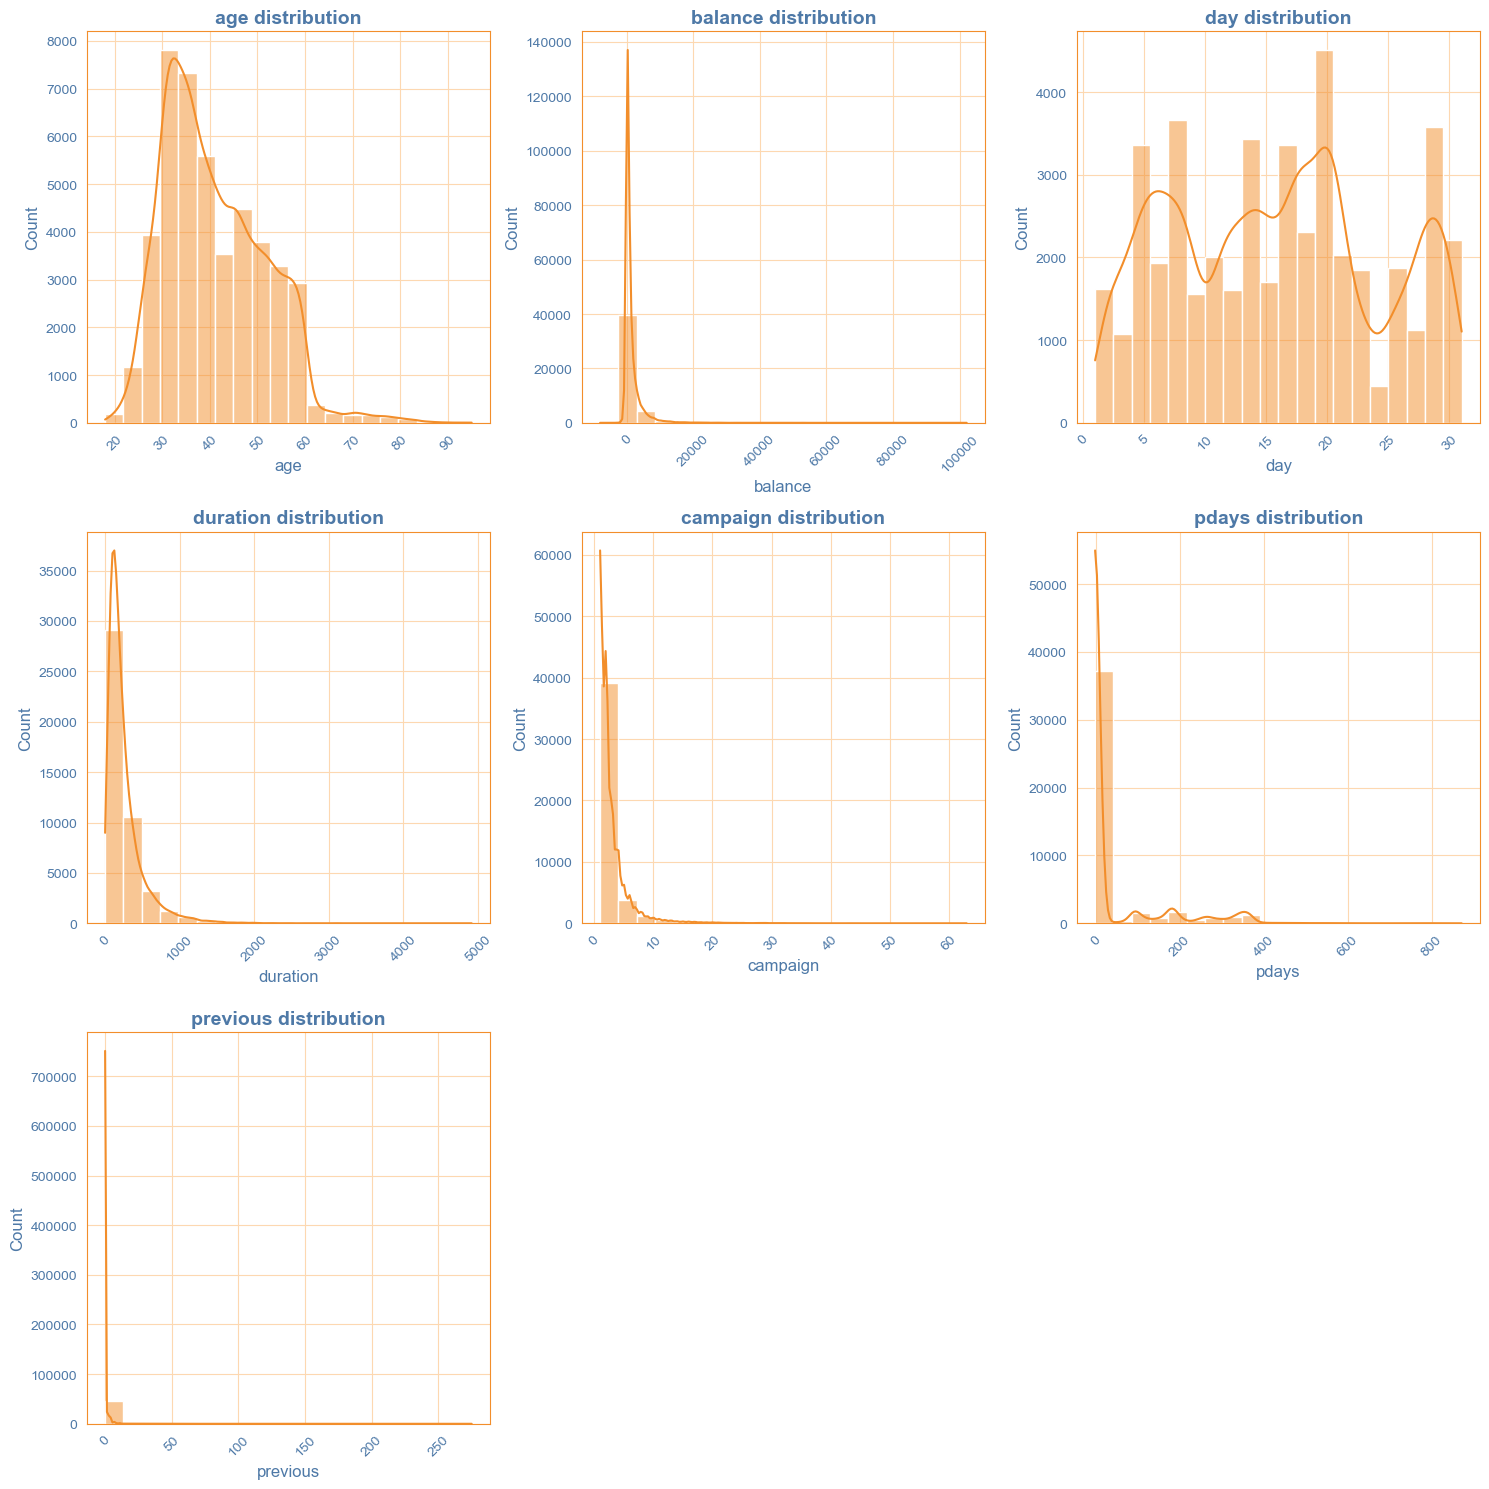

In [66]:

numerical_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()

# Set up the subplot grid
nb_cols = 3  # number of plots per row
nb_rows = (len(numerical_cols) + nb_cols - 1) // nb_cols
fig, axes = plt.subplots(nb_rows, nb_cols, figsize=(5*nb_cols, 5*nb_rows))
axes = axes.flatten()

# Plot each categorical column
for i, col in enumerate(numerical_cols):
    sns.histplot(data=df, x=col, ax=axes[i], kde=True, bins=20)
    axes[i].set_title(f'{col} distribution')
    axes[i].tick_params(axis='x', rotation=45)

# Remove empty subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

- **Age** Right-skewed but not severe. Most clients are in their 30s to 40s.

- **Balance** Extremely right-skewed (long tail).Most values are clustered near 0, but a few clients have very high balances.

- **Day** Fairly uniform with some peaks.

- **Duration** Severely right-skewed.=>Use log1p(duration) for analysis/hypothesis testing to reduce skew.

- **Campaign** Right-skewed. Create a new categorical column for better visualisation.

- **Pdays** Highly skewed with many zeros.

- **Previous** Extremely right-skewed (huge spike at 0). Create a new categorical column for better visualisation and analysis

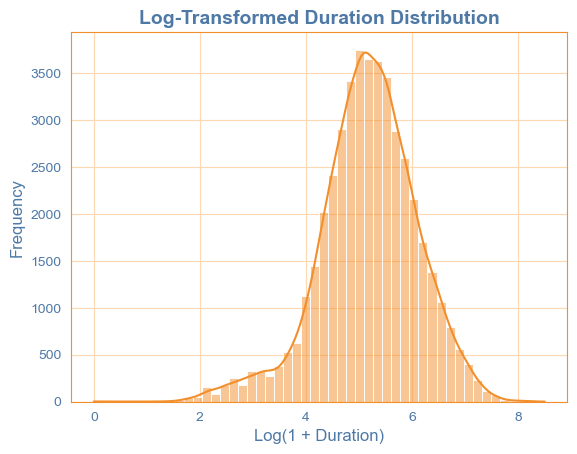

In [67]:
#Log transformation for duration for better visualisation

df['log_duration'] = np.log1p(df['duration'])  # log(1 + x) because duration contains 0 values
sns.histplot(df['log_duration'], kde=True, bins=50)
plt.title("Log-Transformed Duration Distribution")
plt.xlabel("Log(1 + Duration)")
plt.ylabel("Frequency")
plt.show()

The log transformation of duration reduced its right skew, compressed extreme values, and produced a more symmetrical, bell-shaped distribution.

In [68]:
# Group 'campaign' into 4 categorical bins
bins = [0, 1, 2, 6, np.inf]
labels = ['1', '2', '3-6','>6']
df['campaign_nb_contact'] = pd.cut(df['campaign'], bins=bins, labels=labels)

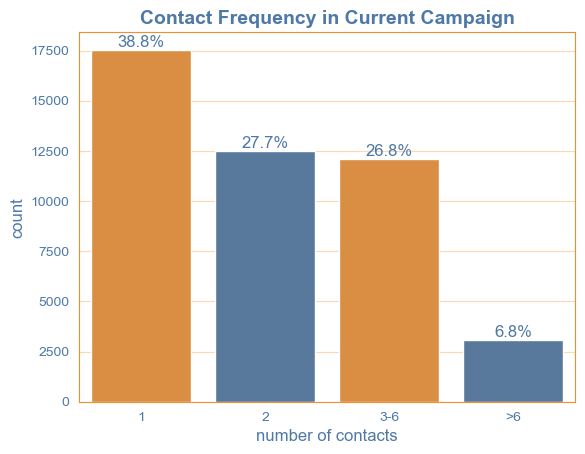

In [69]:
ax=sns.countplot(data=df, x='campaign_nb_contact', palette= custom_palette)
plt.xlabel('number of contacts')
plt.title('Contact Frequency in Current Campaign')
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if not pd.isna(height):
            ax.annotate(f'{(height/len(df))*100:.1f}%', 
                        (bar.get_x() + bar.get_width()/2, height), 
                        ha='center', va='bottom', fontsize=12)
plt.show()


In [70]:
# Bin Number of Past Contacts into Engagement Categories

def contact_history(row):
    if row['pdays'] == -1:
        return 'Never Contacted'
    elif row['previous'] == 0:
        return 'Contacted but No Response'
    elif row['previous'] == 1:
        return 'Contacted Once'
    elif row['previous'] == 2:
        return 'Contacted Twice'
    else:
        return 'Contacted 3+ Times'

df['previous_contact'] = df.apply(contact_history, axis=1)

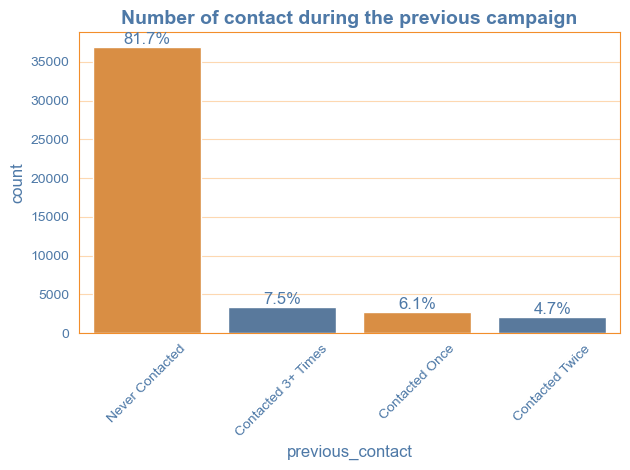

In [71]:
ax=sns.countplot(data=df, x='previous_contact', palette= custom_palette)
plt.title(f'Number of contact during the previous campaign')
plt.tick_params(axis='x', rotation=45)
plt.tight_layout()
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if not pd.isna(height):
            ax.annotate(f'{(height/len(df))*100:.1f}%', 
                        (bar.get_x() + bar.get_width()/2, height), 
                        ha='center', va='bottom', fontsize=12)
plt.show()



### BIVARIATE ANALYSIS 

#### Subscription rate by age group

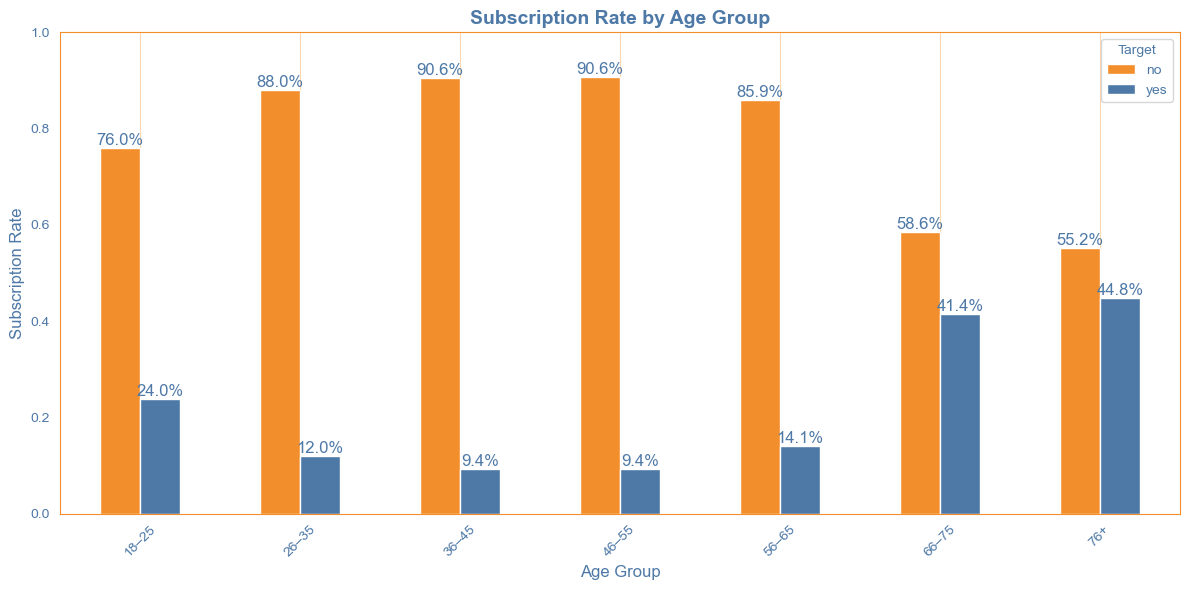

In [72]:
# Define age bins
bins = [17, 25, 35, 45, 55, 65, 75, 100]
labels = ['18–25', '26–35', '36–45', '46–55', '56–65', '66–75', '76+']

# Group by binned age and calculate subscription rate
age_subscription = df.groupby(pd.cut(df['age'], bins=bins, labels=labels))['Target'].value_counts(normalize=True).unstack()

# Plot
ax=age_subscription.plot(kind='bar', figsize=(12,6))
plt.title('Subscription Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Subscription Rate')
plt.tick_params(axis='x', rotation=45)
plt.ylim(0, 1)
plt.grid(axis='y')
plt.tight_layout()

# Add percentage labels on each bar
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if not pd.isna(height):
            ax.annotate(f'{height*100:.1f}%', 
                        (bar.get_x() + bar.get_width()/2, height), 
                        ha='center', va='bottom', fontsize=12)
plt.show()


- 18–25 has the highest subscription rate (24%)

- 26–55 groups have the lowest rates (~9–12%)

- 66+ show improved conversion

- Younger adults and older retirees are more likely to subscribe, while middle-aged clients are the least responsive.

#### Subscription rate by Education

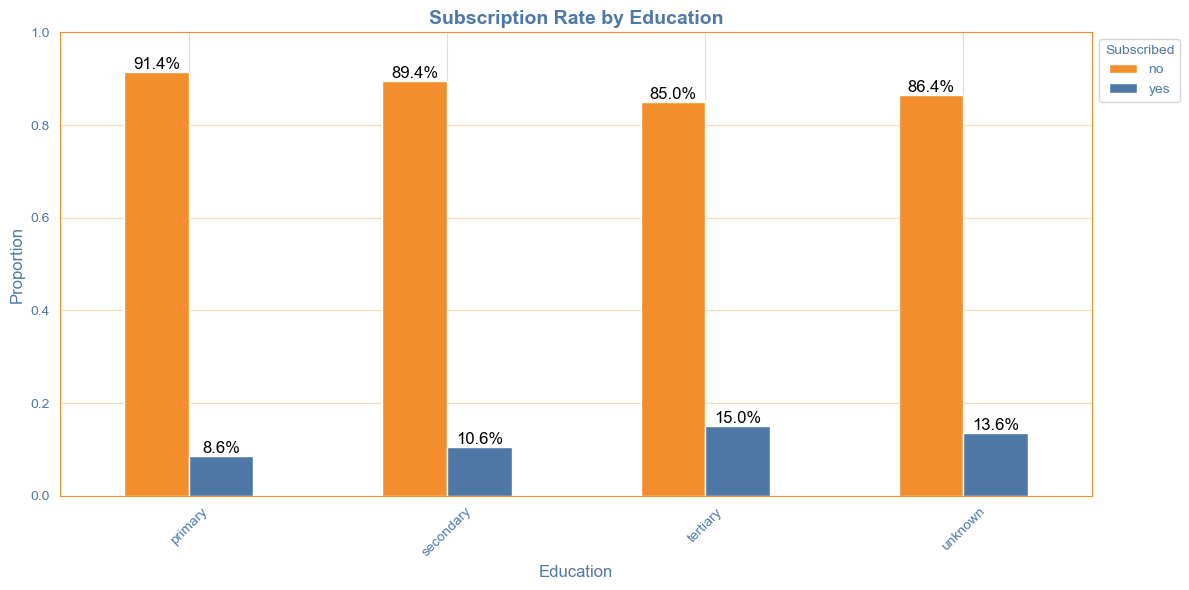

In [73]:
# Calculate normalized subscription rate
education_target = df.groupby('education')['Target'].value_counts(normalize=True).unstack()

# Plot
ax=education_target.plot(kind='bar', stacked=False, figsize=(12,6))
plt.title('Subscription Rate by Education')
plt.ylabel('Proportion')
plt.xlabel('Education')
plt.tick_params(axis='x', rotation=45)
plt.ylim(0,1)
plt.legend(title='Subscribed', loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
# Add percentage labels on each bar
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if not pd.isna(height):
            ax.annotate(f'{height*100:.1f}%', 
                        (bar.get_x() + bar.get_width()/2, height), 
                        ha='center', va='bottom', fontsize=12, color='black')
plt.show()

- Education level has moderate impact:

- Tertiary: Highest subscription (~15%)

- Secondary & Primary: Lower rates (~9–11%)

- Unknown: Least likely to subscribe                               
Higher education slightly increases likelihood of subscription.

#### Subscription rate by Contact type

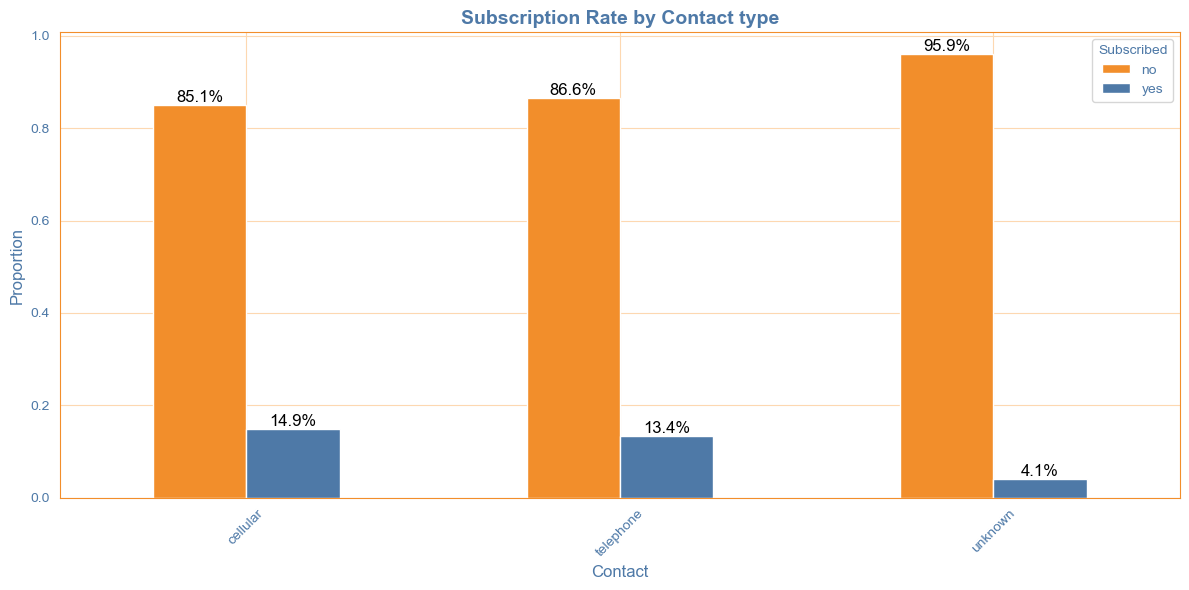

In [74]:
# Calculate normalized subscription rate
contact_target = df.groupby('contact')['Target'].value_counts(normalize=True).unstack()

# Plot
ax=contact_target.plot(kind='bar', stacked=False, figsize=(12,6))
plt.title('Subscription Rate by Contact type')
plt.ylabel('Proportion')
plt.xlabel('Contact')
plt.tick_params(axis='x', rotation=45)
plt.legend(title='Subscribed', loc='upper right')

plt.tight_layout()
# Add percentage labels on each bar
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if not pd.isna(height):
            ax.annotate(f'{height*100:.1f}%', 
                        (bar.get_x() + bar.get_width()/2, height), 
                        ha='center', va='bottom', fontsize=12, color='black')
plt.show()

- Cellular: Highest success (~15%)

- Telephone: Moderate (~13%)

- Unknown: Very low (~4%)                                          
Communication via cellular leads to better outcomes.

#### Subscription rate by Month

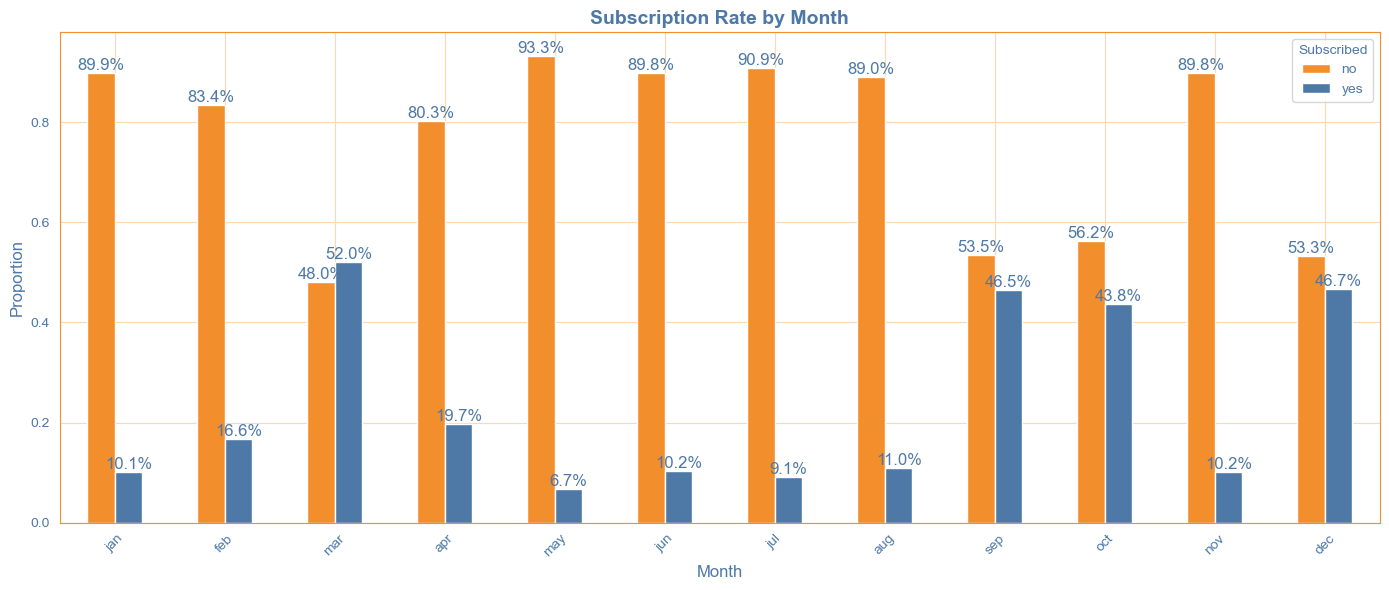

In [75]:

month_target = df.groupby('month')['Target'].value_counts(normalize=True).unstack()
month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 
               'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
month_target = month_target.reindex(month_order)
ax=month_target.plot(kind='bar', stacked=False, figsize=(14,6))
plt.title('Subscription Rate by Month')
plt.ylabel('Proportion')
plt.xlabel('Month')
plt.tick_params(axis='x', rotation=45)
plt.legend(title='Subscribed', loc='upper right')
plt.tight_layout()

# Add percentage labels on each bar
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if not pd.isna(height):
            ax.annotate(f'{height*100:.1f}%', 
                        (bar.get_x() + bar.get_width()/2, height), 
                        ha='center', va='bottom', fontsize=12)
plt.show()

- March (52%) and December (47%): Highest conversion 

- May: Lowest despite highest contact volume (~7%)

Timing significantly impacts campaign success.

#### Job vs Subscription

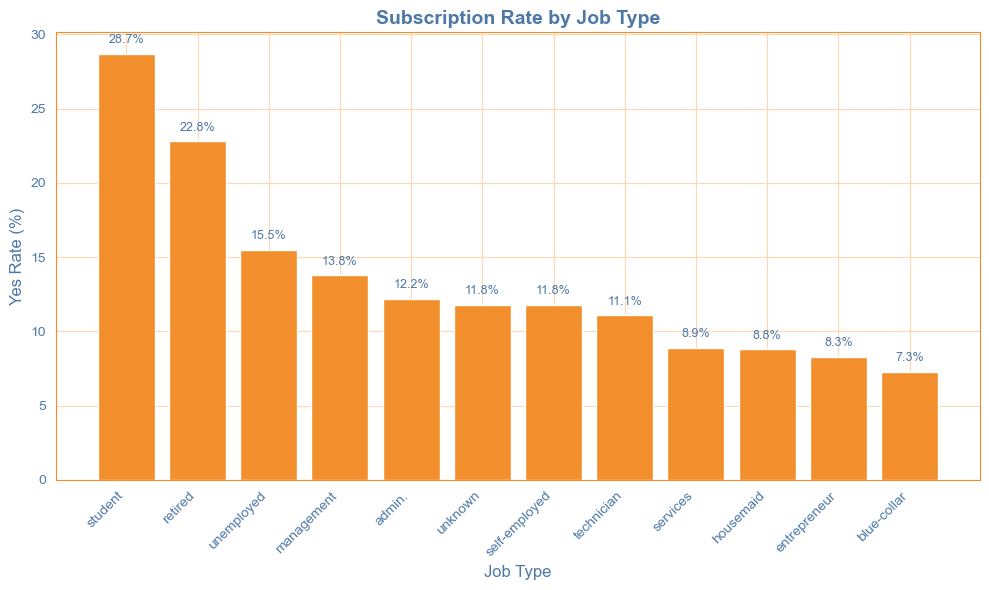

In [76]:

crosstab = pd.crosstab(df['job'], df['Target'], margins=True)
crosstab['Yes Rate (%)'] = round((crosstab['yes'] / crosstab['All']) * 100, 1)
data = crosstab.drop('All').sort_values(by='Yes Rate (%)', ascending=False)

# Plot Yes Rate by job
plt.figure(figsize=(10, 6))
bars = plt.bar(data.index, data['Yes Rate (%)'])

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f'{yval:.1f}%', 
             ha='center', va='bottom', fontsize=9)

plt.title('Subscription Rate by Job Type')
plt.ylabel('Yes Rate (%)')
plt.xlabel('Job Type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Students and Retired has highest interest to subscribe.=> Clients not in the workforce or with stable income are more likely to subscribe.

#### Subscription Patterns by Marital Status, Credit Risk, and Contact Frequency

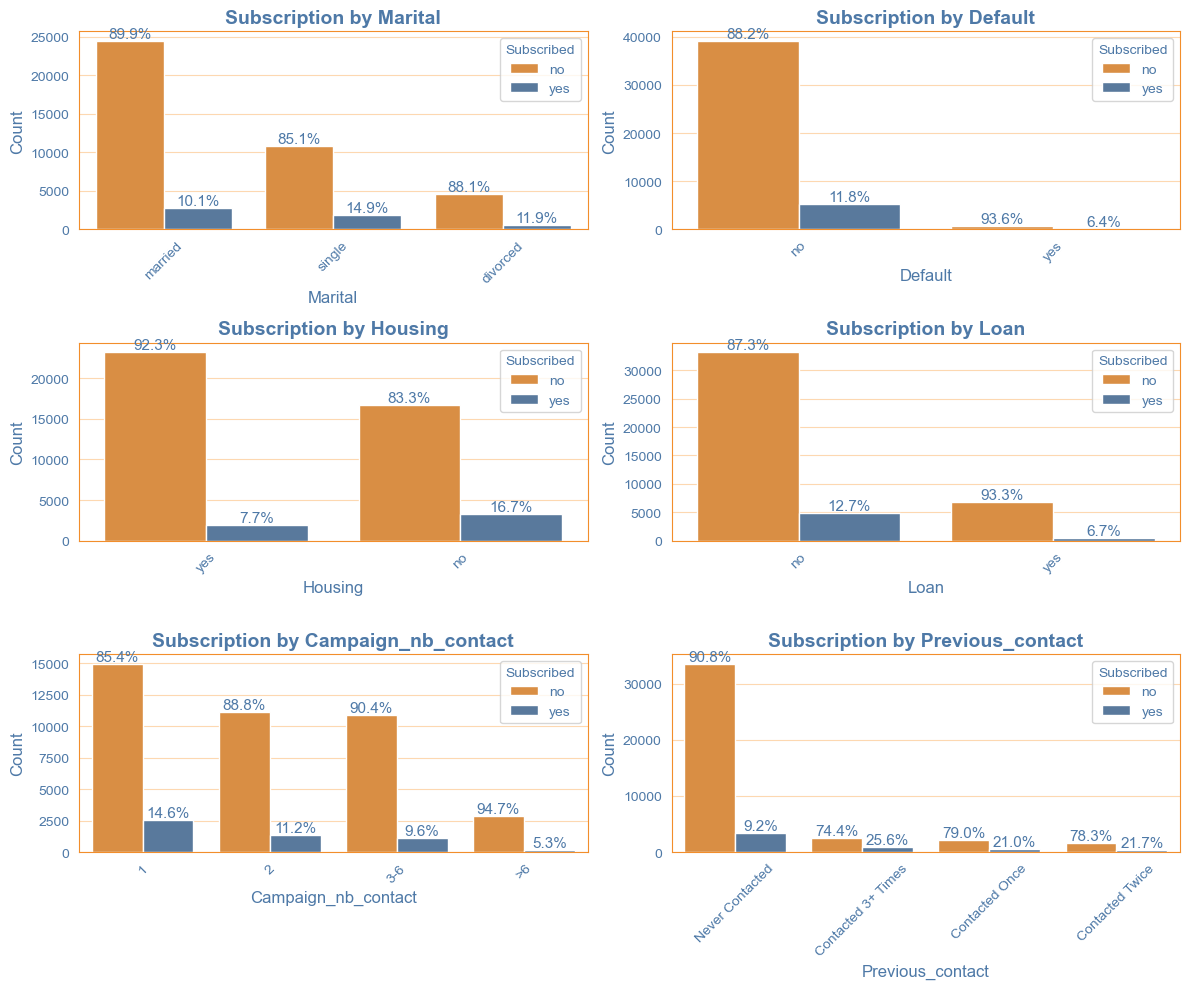

In [77]:
categorical_cols = ['marital', 'default', 'housing', 'loan','campaign_nb_contact', 'previous_contact' ]
plt.figure(figsize=(12, 10))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 2, i)
    ax = sns.countplot(data=df, x=col, hue='Target')
    plt.title(f'Subscription by {col.capitalize()}')
    plt.xlabel(col.capitalize())
    plt.ylabel('Count')
    plt.tick_params(axis='x', rotation=45)
    plt.legend(title='Subscribed')

    # Get total counts per category (grouped by the x-axis category)
    total_per_category = df[col].value_counts().to_dict()

    for container in ax.containers:
        for bar in container:
            height = bar.get_height()
            category = bar.get_x() + bar.get_width() / 2
            label = bar.get_label()  # 0 or 1

            # Get x-tick label
            xtick_index = int(round(category))
            if xtick_index < len(ax.get_xticks()):
                x_label = ax.get_xticklabels()[xtick_index].get_text()
                total = df[df[col] == x_label].shape[0]
                pct = (height / total) * 100 if total != 0 else 0
                ax.annotate(f'{pct:.1f}%',
                            (bar.get_x() + bar.get_width() / 2, height),
                            ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.show()

Higher subscription likelihood is associated with being single, having no loan/housing debt, no credit default, fewer campaign contacts, and previous contact history.

Targeted follow-up with engaged users may be more effective than repeated cold contacts.

#### Previous campaign outcome vs Subscription 

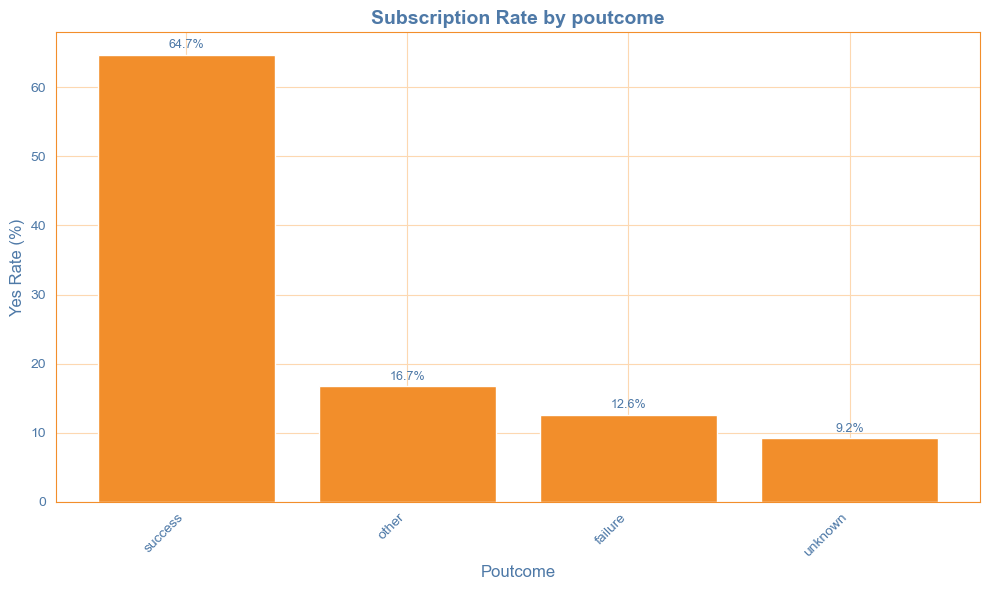

In [78]:

crosstab = pd.crosstab(df['poutcome'], df['Target'], margins=True)

crosstab['Yes Rate (%)'] = round((crosstab['yes'] / crosstab['All']) * 100, 1)
data = crosstab.drop('All').sort_values(by='Yes Rate (%)', ascending=False)

# Plot Yes Rate by job
plt.figure(figsize=(10, 6))
bars = plt.bar(data.index, data['Yes Rate (%)'])

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f'{yval:.1f}%', 
             ha='center', va='bottom', fontsize=9)

plt.title('Subscription Rate by poutcome')
plt.ylabel('Yes Rate (%)')
plt.xlabel('Poutcome')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

- Success in a previous campaign is a strong positive indicator for subscription (64.7%).

Customers with a past successful outcome should be prioritized in future campaigns.

##### Balance vs Subscription Status

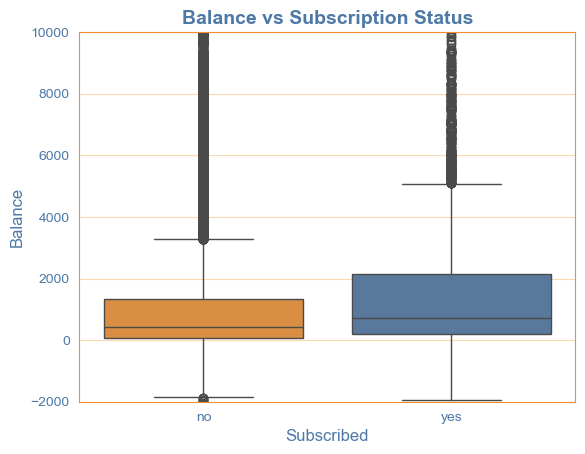

In [79]:
sns.boxplot(x='Target', y='balance', data=df, palette= custom_palette)
plt.title('Balance vs Subscription Status')
plt.xlabel('Subscribed')
plt.ylabel('Balance')
plt.ylim(-2000, 10000) # Optional: adjust y-axis for readability
plt.grid(True)
plt.show()

- Clients with higher balances tend to subscribe more.

Suggests financial stability plays a key role


##### Subscription by Day of Month

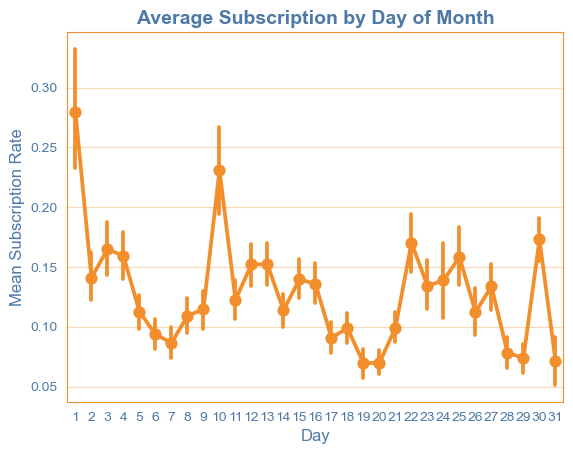

In [80]:
sns.pointplot(x='day', y='Target', data=df.replace({'Target': {'yes': 1, 'no': 0}}))
plt.title('Average Subscription by Day of Month')
plt.ylabel('Mean Subscription Rate')
plt.xlabel('Day')
plt.show()

Subscriptions are fairly evenly distributed throughout the month with slight peaks around the 1st and 10th. No clear trend.

##### Log_duration and pdays vs Subscription

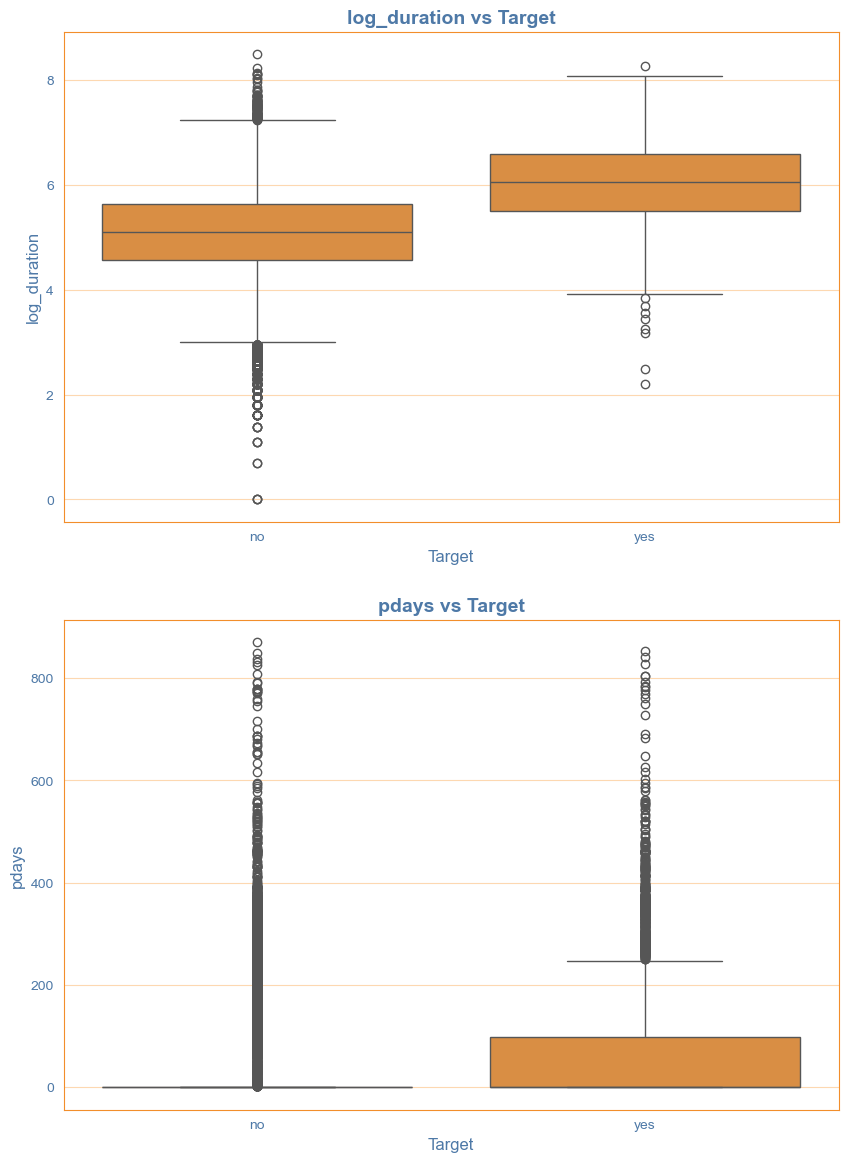

In [81]:
# Subscription rate by log_duration and pdays
target_col = "Target"
numeric_cols=['log_duration','pdays']
# Boxplots: Numeric vs Target
fig, ax = plt.subplots(len(numeric_cols), 1, figsize=(10, 7 * len(numeric_cols)))
for i, col in enumerate(numeric_cols):
    sns.boxplot(data=df, x=target_col, y=col, ax=ax[i])
    ax[i].set_title(f'{col} vs {target_col}')

- There are more long-duration calls among subscribers.

Longer calls are associated with a higher likelihood of subscription.

- Most non-subscribers were never contacted before (indicated by pdays = -1).

- For subscribers, pdays is more spread out, with a lower median, suggesting they were contacted more recently.

Customers contacted more recently are more likely to subscribe.



### Correlation and Heatmaps

#### Encode bianary fields

In [82]:
# List of binary yes/no columns
binary_cols = ['default', 'housing', 'loan', 'Target']

# Encode yes/no to 1/0
df[binary_cols] = df[binary_cols].apply(lambda col: col.str.strip().str.lower())
df[binary_cols] = df[binary_cols].apply(lambda col: col.map({'yes': 1, 'no': 0}))

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   age                  45211 non-null  int64   
 1   job                  45211 non-null  object  
 2   marital              45211 non-null  object  
 3   education            45211 non-null  object  
 4   default              45211 non-null  int64   
 5   balance              45211 non-null  int64   
 6   housing              45211 non-null  int64   
 7   loan                 45211 non-null  int64   
 8   contact              45211 non-null  object  
 9   day                  45211 non-null  int64   
 10  month                45211 non-null  object  
 11  duration             45211 non-null  int64   
 12  campaign             45211 non-null  int64   
 13  pdays                45211 non-null  int64   
 14  previous             45211 non-null  int64   
 15  poutcome           

##### Pairplot

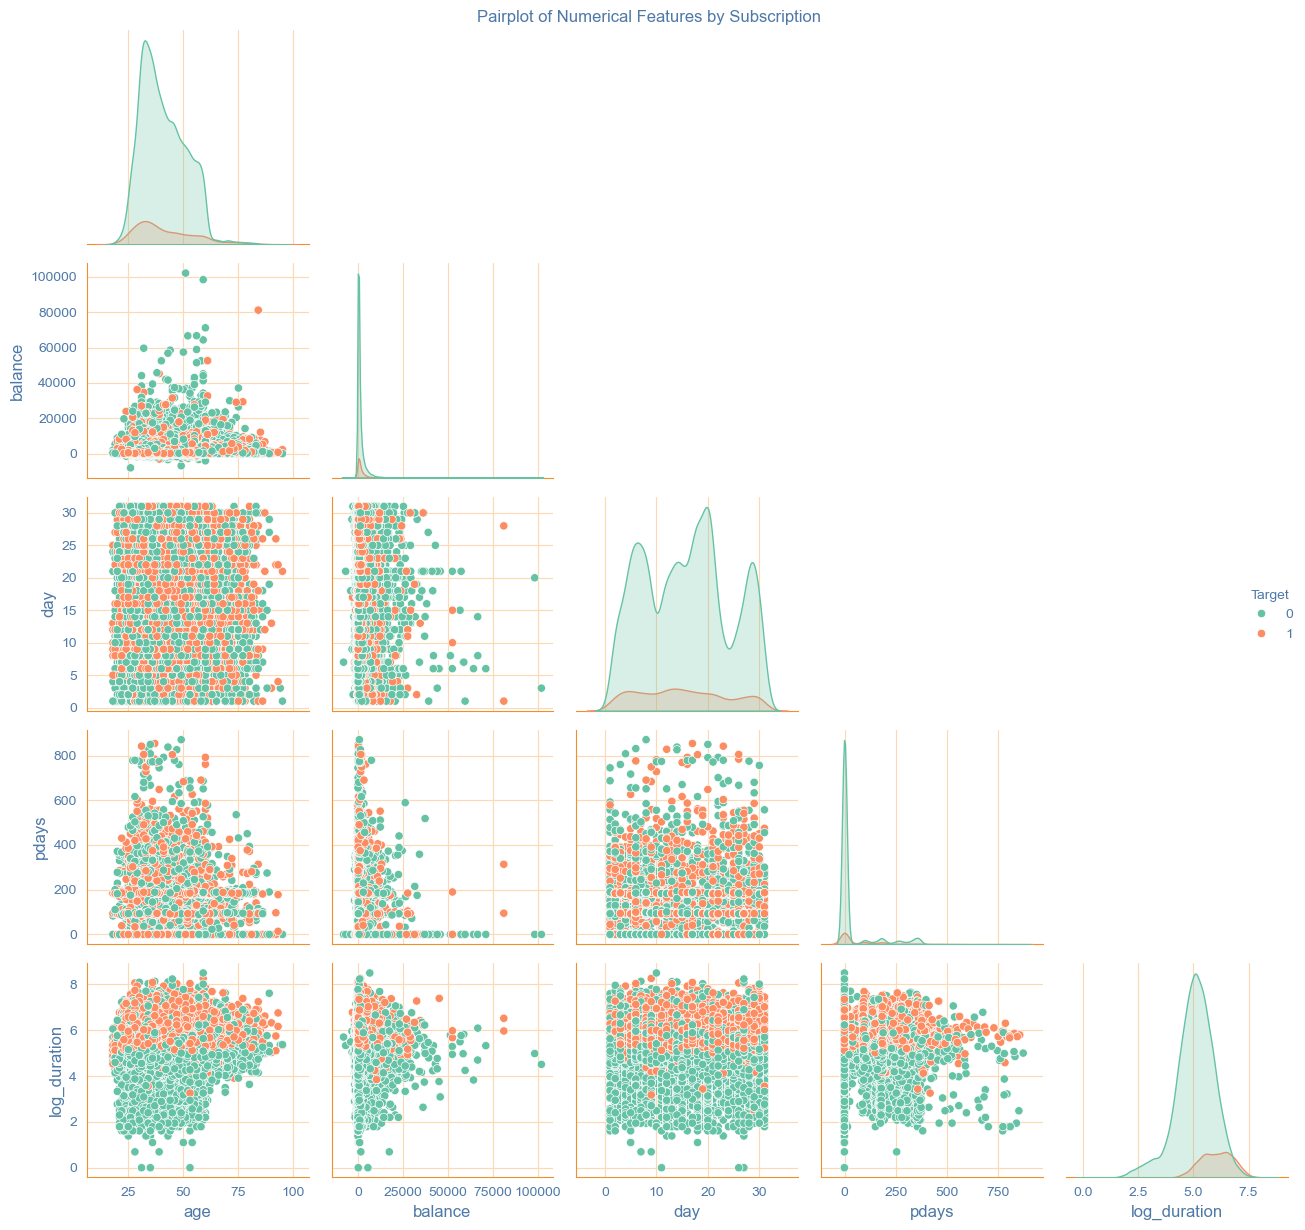

In [84]:
# Relevant numerical features 
pairplot_features = ['age','balance','day', 'pdays', 'log_duration']

# Convert 'Target' to string for clear coloring
df['Target'] = df['Target'].astype(str)

# Create the pairplot
sns.pairplot(df[pairplot_features + ['Target']], hue='Target', palette='Set2', corner=True)

plt.suptitle('Pairplot of Numerical Features by Subscription')
plt.tight_layout()
plt.show()

log_duration and pdays are the most discriminative variables for predicting subscription.

Other features like age, balance, and day show weaker separation but may still contribute marginally.

Most subscribers had longer call durations and were contacted more recently.

##### Heatmap

Text(0.5, 1.0, 'Correlation Matrix')

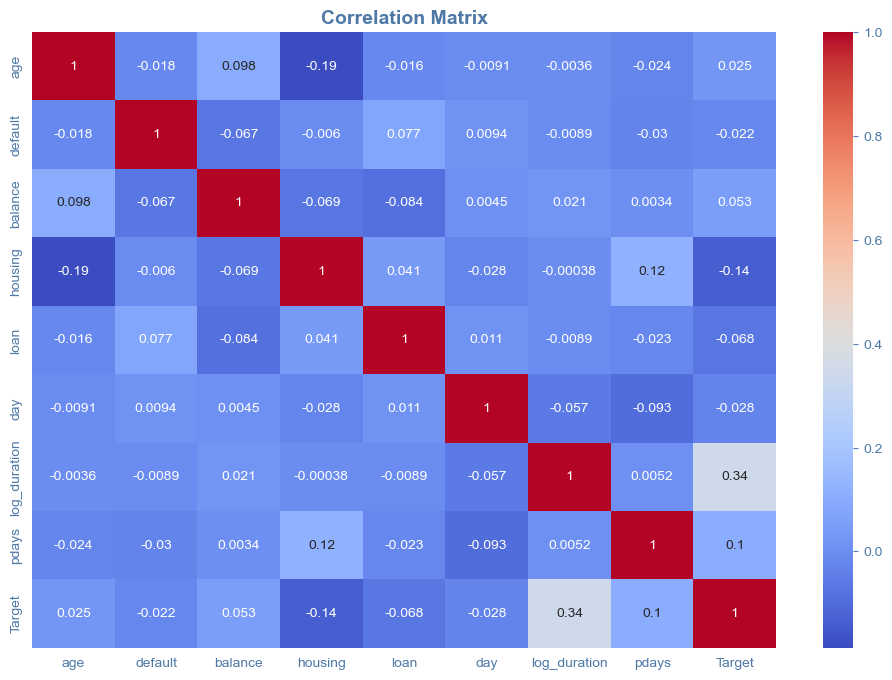

In [85]:
# 4. Correlation Matrix
df['Target'] = df['Target'].astype(int)
features=['age','default','balance','housing','loan','day','log_duration','pdays','Target']
correlation_matrix = df[features].corr()
fig5, ax5 = plt.subplots(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", ax=ax5)
ax5.set_title("Correlation Matrix")


- Log_duration has the highest positive correlation with subscription.
- Other correlations are weak, suggesting nonlinear effects or categorical influence.

### Save the clean dataset

In [86]:
# Get all column names
cols = list(df.columns)

# Move 'Target' to the end
cols = [col for col in cols if col != 'Target'] + ['Target']

# Reorder the DataFrame
df_clean = df[cols]

df_clean.to_csv('cleaned_banking_dataset.csv', index=False)

## 🔬 Hypothesis Testing

**H₀ (Null Hypothesis):** There is no significant relationship between the variable and the subscription outcome.              
**H₁ (Alternative Hypothesis):** There is a significant relationship between the variable and the subscription outcome.

To assess the relationship between various client features and subscription outcomes, multiple statistical tests were applied.

### Numerical Variables
Numerical variables were evaluated using ANOVA, Mann-Whitney U, and the Kolmogorov-Smirnov (KS) tests to identify significant differences between subscribers and non-subscribers.
 

#### ANOVA

In [87]:
from scipy.stats import f_oneway

# List of your numerical columns
numerical_cols = ['age', 'balance', 'day', 'log_duration', 'pdays']

for col in numerical_cols:
    # Group by Target values
    group_0 = df[df['Target'] == 0][col]
    group_1 = df[df['Target'] == 1][col]
    
    f_stat, p_value = f_oneway(group_0, group_1)
    
    print(f"{col}:")
    print(f"  F-statistic = {f_stat:.4f}")
    print(f"  p-value = {p_value:.4e}")
    print(f"  Significant? {'✅ Yes' if p_value < 0.05 else '❌ No'}\n")
    print("-" * 40)

age:
  F-statistic = 28.6252
  p-value = 8.8256e-08
  Significant? ✅ Yes

----------------------------------------
balance:
  F-statistic = 126.5723
  p-value = 2.5211e-29
  Significant? ✅ Yes

----------------------------------------
day:
  F-statistic = 36.3590
  p-value = 1.6539e-09
  Significant? ✅ Yes

----------------------------------------
log_duration:
  F-statistic = 6018.9138
  p-value = 0.0000e+00
  Significant? ✅ Yes

----------------------------------------
pdays:
  F-statistic = 490.6966
  p-value = 3.7906e-108
  Significant? ✅ Yes

----------------------------------------


All five tested variables (age, balance, day, log_duration, pdays) showed statistically significant differences between groups (p < 0.05).

log_duration had the strongest separation (F = 6018.91, p ≈ 0).

#### Mann-Whitney U Test (for numeric vs Target)

In [88]:
from scipy.stats import mannwhitneyu

num_cols = ['age', 'balance', 'log_duration', 'day','pdays']

for col in num_cols:
    group_0 = df[df['Target'] == 0][col].dropna()
    group_1 = df[df['Target'] == 1][col].dropna()
    
    U_stat, p_value = mannwhitneyu(group_0, group_1, alternative='two-sided')
    print(f"{col} — Mann-Whitney U Test:")
    print(f"  U-statistic = {U_stat:.2f}, p-value = {p_value:.4e}")
    print(f"  Significant? {'✅ Yes' if p_value < 0.05 else '❌ No'}\n")
    print("-" * 40)


age — Mann-Whitney U Test:
  U-statistic = 107232348.50, p-value = 6.2818e-02
  Significant? ❌ No

----------------------------------------
balance — Mann-Whitney U Test:
  U-statistic = 86557474.50, p-value = 6.5938e-101
  Significant? ✅ Yes

----------------------------------------
log_duration — Mann-Whitney U Test:
  U-statistic = 40625701.00, p-value = 0.0000e+00
  Significant? ✅ Yes

----------------------------------------
day — Mann-Whitney U Test:
  U-statistic = 111173346.00, p-value = 3.3261e-10
  Significant? ✅ Yes

----------------------------------------
pdays — Mann-Whitney U Test:
  U-statistic = 85889711.50, p-value = 2.4841e-235
  Significant? ✅ Yes

----------------------------------------


Confirmed significant differences for all variables except age.

log_duration and pdays had extremely small p-values, confirming strong non-parametric separation.

#### Kolmogorov-Smirnov Test (for comparing distributions)

In [89]:
from scipy.stats import ks_2samp

numerical_cols = ['age', 'balance', 'log_duration', 'day','pdays']

for col in numerical_cols:
    group_0 = df[df['Target'] == 0][col].dropna()
    group_1 = df[df['Target'] == 1][col].dropna()
    
    ks_stat, p_value = ks_2samp(group_0, group_1)
    print(f"{col} — KS Test:")
    print(f"  KS-Statistic = {ks_stat:.4f}, p-value = {p_value:.4e}")
    print(f"  Distributions differ? {'✅ Yes' if p_value < 0.05 else '❌ No'}\n")
    print("-" * 40)

age — KS Test:
  KS-Statistic = 0.0838, p-value = 5.7330e-29
  Distributions differ? ✅ Yes

----------------------------------------
balance — KS Test:
  KS-Statistic = 0.1291, p-value = 2.5287e-68
  Distributions differ? ✅ Yes

----------------------------------------
log_duration — KS Test:
  KS-Statistic = 0.4445, p-value = 0.0000e+00
  Distributions differ? ✅ Yes

----------------------------------------
day — KS Test:
  KS-Statistic = 0.0658, p-value = 4.8366e-18
  Distributions differ? ✅ Yes

----------------------------------------
pdays — KS Test:
  KS-Statistic = 0.2016, p-value = 6.4577e-167
  Distributions differ? ✅ Yes

----------------------------------------


All variables showed distributional differences between subscribers and non-subscribers.

Again, log_duration stood out (D = 0.44, p ≈ 0), confirming the highest separation in distribution shape.

**Takeaway**

All numerical variables show statistically significant differences between subscribers and non-subscribers.
log_duration had the strongest separation, confirmed by all tests.

### Categorical Variables
We used the Chi-Square Test of Independence to assess the relationship between each categorical variable and subscription status.

####  Chi-square

In [90]:
from scipy.stats import chi2_contingency

# List of categorical columns to test (excluding 'Target')
categorical_cols = [
    'job', 'marital', 'education', 'contact', 'month',
    'poutcome', 'campaign_nb_contact', 'previous_contact']

# Run chi-square tests
for col in categorical_cols:
    contingency_table = pd.crosstab(df[col], df['Target'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    print(f"{col}:")
    print(f"  Chi-square = {chi2:.4f}")
    print(f"  p-value    = {p:.4e}")
    print(f"  Significant? {'✅ Yes' if p < 0.05 else '❌ No'}")
    print("-" * 40)

job:
  Chi-square = 836.1055
  p-value    = 3.3371e-172
  Significant? ✅ Yes
----------------------------------------
marital:
  Chi-square = 196.4959
  p-value    = 2.1451e-43
  Significant? ✅ Yes
----------------------------------------
education:
  Chi-square = 238.9235
  p-value    = 1.6267e-51
  Significant? ✅ Yes
----------------------------------------
contact:
  Chi-square = 1035.7142
  p-value    = 1.2517e-225
  Significant? ✅ Yes
----------------------------------------
month:
  Chi-square = 3061.8389
  p-value    = 0.0000e+00
  Significant? ✅ Yes
----------------------------------------
poutcome:
  Chi-square = 4391.5066
  p-value    = 0.0000e+00
  Significant? ✅ Yes
----------------------------------------
campaign_nb_contact:
  Chi-square = 318.6002
  p-value    = 9.3703e-69
  Significant? ✅ Yes
----------------------------------------
previous_contact:
  Chi-square = 1301.5347
  p-value    = 6.8365e-282
  Significant? ✅ Yes
----------------------------------------


**Takeaway**

All tested categorical variables are strongly associated with subscription status.
poutcome and month showed exceptionally strong associations, with very low p-values and high Chi-square values.